In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/drive/MyDrive/data/Uber_segmentation/archive/rideshare_kaggle.csv')

df = df.drop(columns = ['cab_type','id','datetime'])

df

,timestamp,hour,day,month,timezone,source,destination,product_id,name,price,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,America/New_York,Haymarket Square,North Station,lyft_line,Shared,5.0,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,America/New_York,Haymarket Square,North Station,lyft_premier,Lux,11.0,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,America/New_York,Haymarket Square,North Station,lyft,Lyft,7.0,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,America/New_York,Haymarket Square,North Station,lyft_luxsuv,Lux Black XL,26.0,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,America/New_York,Haymarket Square,North Station,lyft_plus,Lyft XL,9.0,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.543708e+09,23,1,12,America/New_York,West End,North End,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,1.543708e+09,23,1,12,America/New_York,West End,North End,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,1.543708e+09,23,1,12,America/New_York,West End,North End,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,1.543708e+09,23,1,12,America/New_York,West End,North End,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    693071 non-null  float64
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   timezone                     693071 non-null  object 
 5   source                       693071 non-null  object 
 6   destination                  693071 non-null  object 
 7   product_id                   693071 non-null  object 
 8   name                         693071 non-null  object 
 9   price                        637976 non-null  float64
 10  distance                     693071 non-null  float64
 11  surge_multiplier             693071 non-null  float64
 12  latitude                     693071 non-null  float64
 13 

In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [ ]:
df.isnull().sum()

timestamp                          0
hour                               0
day                                0
month                              0
timezone                           0
source                             0
destination                        0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
t

In [ ]:
# remove the rows where the price is not present
df.dropna(axis = 0 , inplace = True)
df.isnull().sum()

timestamp                      0
hour                           0
day                            0
month                          0
timezone                       0
source                         0
destination                    0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTe

In [ ]:
category = []
for i in df.columns:
    if df[i].dtype=='O':
        category.append(i)


for i in category:
    print('Distribution of',i)
    print(df[i].value_counts())
    print('-'*60)

Distribution of timezone
America/New_York    637976
Name: timezone, dtype: int64
------------------------------------------------------------
Distribution of source
Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: source, dtype: int64
------------------------------------------------------------
Distribution of destination
Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                  

In [ ]:
for i in df.columns:
    if df[i].dtype != 'O':
        print('Distribution of',i)
        print(df[i].value_counts())
        print('-'*60)

Distribution of timestamp
1.545000e+09    421
1.543422e+09    150
1.543416e+09    149
1.543402e+09    149
1.543424e+09    148
               ... 
1.543697e+09      1
1.543505e+09      1
1.543404e+09      1
1.544690e+09      1
1.544953e+09      1
Name: timestamp, Length: 35796, dtype: int64
------------------------------------------------------------
Distribution of hour
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: hour, dtype: int64
------------------------------------------------------------
Distribution of day
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: day, dtype: int64
-----

1543438800    61093
1543320000    58242
1543690800    41389
1544817600    41378
1544896800    41319
1543852800    41201
1543510800    41051
1544986800    37893
1543788000    37837
1545076800    36181
1544734800    34486
1543611600    28033
1545159600    24717
1543251600    22947
1543244400    21124
1543420800    13743
1543435200    12193
1543608000     6906
1543600800     6872
1544731200     6750
1545080400     5186
1544378400     4063
1543784400     3461
1544968800     3428
1543946400     3140
1544637600     2876
1543186800      467
Name: apparentTemperatureHighTime, dtype: int64
------------------------------------------------------------
Distribution of apparentTemperatureLow
32.12    18829
31.97    13767
30.29    13743
36.70    13492
31.82    12047
         ...  
14.26      584
39.27      390
31.79      146
19.19      141
39.21       77
Name: apparentTemperatureLow, Length: 136, dtype: int64
------------------------------------------------------------
Distribution of apparentTemper

In [ ]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # One-hot encode remaining categorical columns
    for column, prefix in [('timezone',"tz"), ('destination', "dest"), ('source', "src"), ('product_id', "pid"), ('name', "nm"), ('short_summary', "ss"), ('long_summary', "ls"), ('icon', "ic")]:
        df = onehot_encode(df, column=column, prefix=prefix)
    
    X = df
        
    # Scale X
    scaler = StandardScaler()
    scaler.fit(df)
    
    Scaled_df = pd.DataFrame(scaler.transform(df), columns=X.columns)
    
    return Scaled_df

In [ ]:
Scaled_df = preprocess_inputs(df)
Scaled_df

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,ls_ Rain in the morning and afternoon.,ls_ Rain throughout the day.,"ls_ Rain until morning, starting again in the evening.",ic_ clear-day,ic_ clear-night,ic_ cloudy,ic_ fog,ic_ partly-cloudy-day,ic_ partly-cloudy-night,ic_ rain
0,1.315960,-0.376833,-0.180090,0.839574,-1.238169,-1.540640,-0.157905,-2.577771,1.632431,0.410021,...,-0.027065,3.431860,-0.272407,-0.200599,-0.308914,-0.679275,-0.114754,-0.447233,1.839825,-0.421306
1,-1.105077,-1.384206,0.921885,-1.191081,-0.594693,-1.540640,-0.157905,-2.577771,1.632431,0.594394,...,-0.027065,-0.291387,3.670980,-0.200599,-0.308914,-0.679275,-0.114754,-0.447233,-0.543530,2.373570
2,-0.984940,-1.528116,1.022065,-1.191081,-1.023677,-1.540640,-0.157905,-2.577771,1.632431,-0.186218,...,-0.027065,-0.291387,-0.272407,-0.200599,3.237150,-0.679275,-0.114754,-0.447233,-0.543530,-0.421306
3,-0.713960,-1.096385,1.222424,-1.191081,1.013998,-1.540640,-0.157905,-2.577771,1.632431,-0.773535,...,-0.027065,-0.291387,-0.272407,-0.200599,3.237150,-0.679275,-0.114754,-0.447233,-0.543530,-0.421306
4,-0.844868,-1.240295,1.122244,-1.191081,-0.809185,-1.540640,-0.157905,-2.577771,1.632431,-0.318550,...,-0.027065,-0.291387,-0.272407,-0.200599,-0.308914,-0.679275,-0.114754,-0.447233,1.839825,-0.421306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,-0.489348,1.637912,-1.682784,0.839574,-0.755562,-1.047427,-0.157905,0.287088,0.090822,-0.376538,...,-0.027065,-0.291387,-0.272407,-0.200599,-0.308914,-0.679275,-0.114754,-0.447233,1.839825,-0.421306
637972,-0.489348,1.637912,-1.682784,0.839574,-0.380201,-1.047427,-0.157905,0.287088,0.090822,-0.376538,...,-0.027065,-0.291387,-0.272407,-0.200599,-0.308914,-0.679275,-0.114754,-0.447233,1.839825,-0.421306
637973,-0.489348,1.637912,-1.682784,0.839574,-0.755562,-1.047427,-0.157905,0.287088,0.090822,-0.376538,...,-0.027065,-0.291387,-0.272407,-0.200599,-0.308914,-0.679275,-0.114754,-0.447233,1.839825,-0.421306
637974,-0.489348,1.637912,-1.682784,0.839574,1.121244,-1.047427,-0.157905,0.287088,0.090822,-0.376538,...,-0.027065,-0.291387,-0.272407,-0.200599,-0.308914,-0.679275,-0.114754,-0.447233,1.839825,-0.421306


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=50)
pca_df = pca.fit_transform(Scaled_df)
pca_df = pd.DataFrame(pca_df)

In [ ]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,4.227433,2.742441,0.660519,-0.731711,-2.557403,-1.604164,-1.360411,-0.171028,-0.506419,-0.114953,...,0.065333,-0.205501,-0.071416,-0.639130,-0.398105,1.328147,0.785115,-0.100930,-0.512096,0.237340
1,-7.004690,1.931943,5.466211,2.179112,-0.440189,-1.109221,-0.687044,-1.553265,1.590145,-0.052833,...,-0.144100,-0.246081,-0.228664,-0.830984,-0.359621,1.482782,0.626831,-0.060880,-0.718880,0.053331
2,-3.346527,-2.716751,0.006718,1.307865,-1.903953,-0.572774,2.780156,-2.446653,2.032484,0.072220,...,-0.122255,-0.098311,-0.032384,-0.420040,-0.396595,1.293240,0.773852,-0.394744,1.070830,-0.365512
3,-1.392448,-3.623921,-0.939649,2.944187,2.454774,0.136782,2.445027,-2.035909,0.716339,0.071746,...,-0.250796,-0.078337,-0.103195,-0.475629,-0.355824,1.388227,0.764150,-0.453504,0.923851,-0.108715
4,-2.255829,-4.194597,0.162183,-0.516435,-0.920025,-1.147870,-0.208793,0.097158,1.802554,-0.007875,...,-0.106365,-0.200190,-0.105474,-0.679171,-0.430762,1.390165,0.700502,-0.178263,0.117604,0.040340


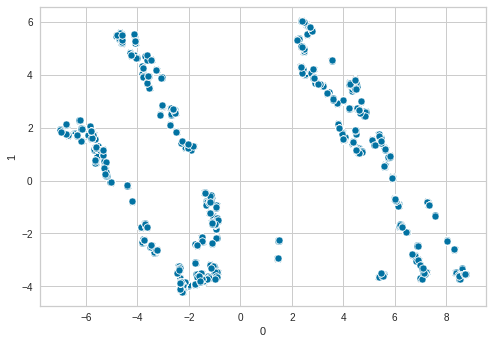

In [ ]:
sns.scatterplot(x=pca_df[0],y=pca_df[1])

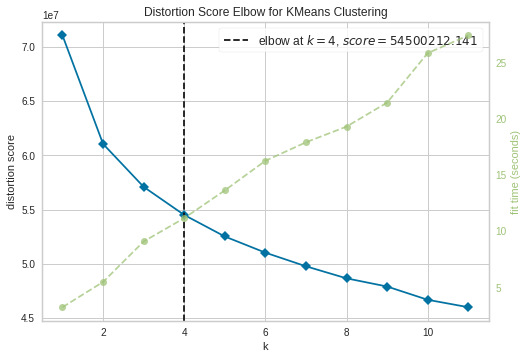

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,12)).fit(pca_df)
visualizer.show()


In [ ]:
# training the model with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df)

KMeans(n_clusters=4)

In [ ]:
# predicting the clusters
np.random.seed(42)
preds = kmeans.predict(pca_df)

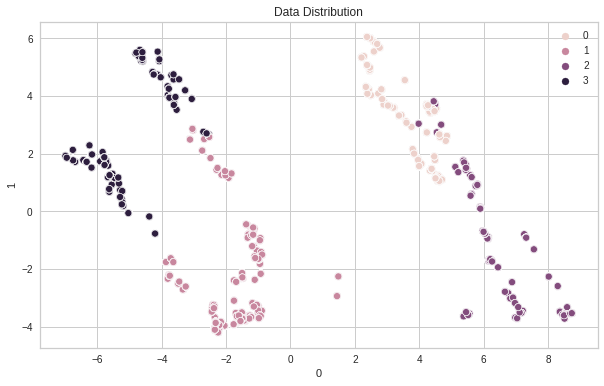

In [ ]:
# plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_df[0],y=pca_df[1],hue=preds)
plt.title('Data Distribution')

plt.show()

In [ ]:
df['cluster'] = preds

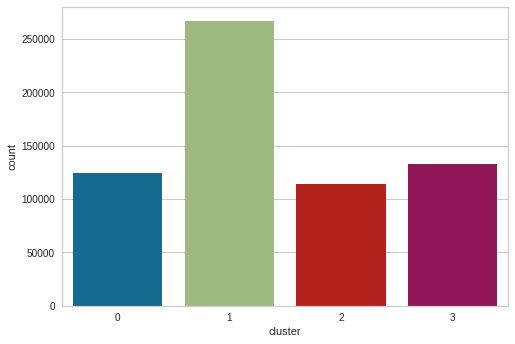

In [ ]:
sns.countplot(x = df['cluster'])
#plt.savefig('count11.png')

In [ ]:
df['cluster'].value_counts()/len(df)*100

1    41.822106
3    20.828997
0    19.439289
2    17.909608
Name: cluster, dtype: float64

In [ ]:
l = ['product_id','timezone','product_id','name','windGustTime','short_summary',
     'long_summary','temperatureHighTime','temperatureLowTime','apparentTemperatureHigh','apparentTemperatureHighTime',
     'apparentTemperatureLow','apparentTemperatureLowTime','windBearing','cloudCover','visibility.1','sunriseTime','sunsetTime','moonPhase',
     'precipIntensityMax','uvIndexTime','temperatureMin','temperatureMinTime','temperatureMax','temperatureMaxTime','precipProbability',
     'windGust','uvIndex','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax','apparentTemperatureMaxTime',
     'cluster','dewPoint','visibility','temperatureHigh','apparentTemperature']

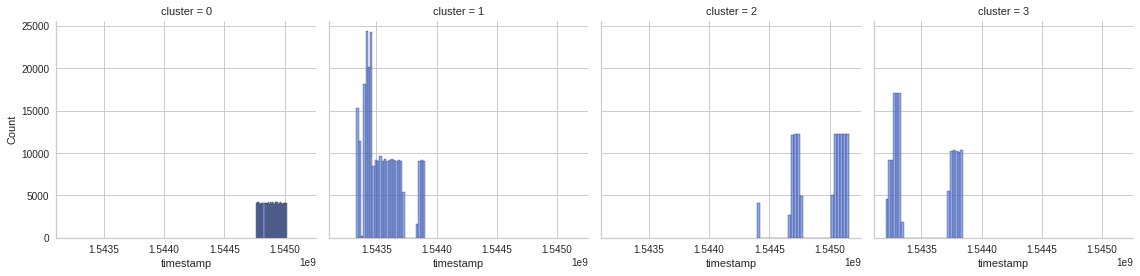

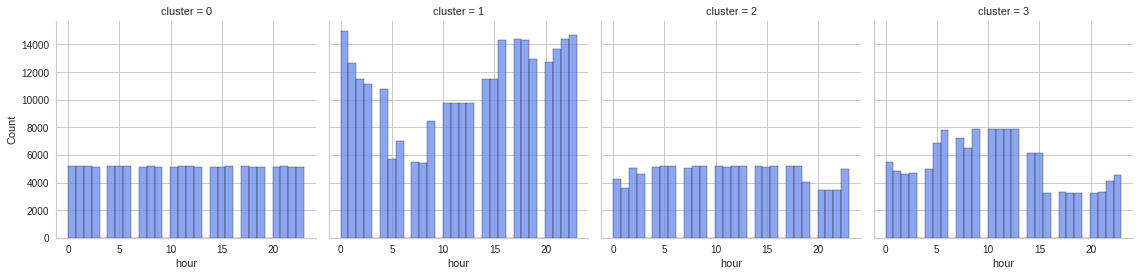

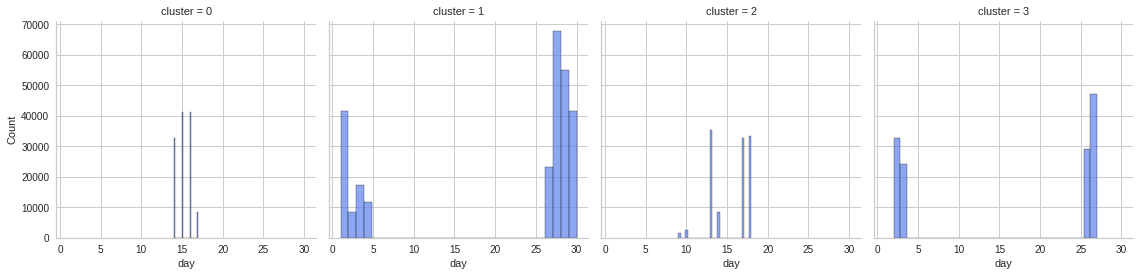

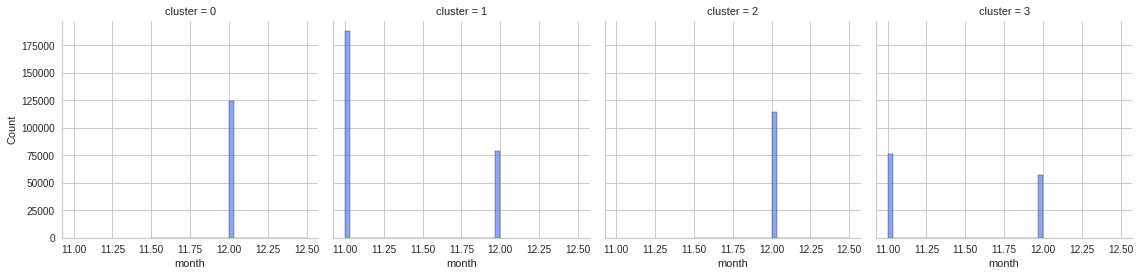

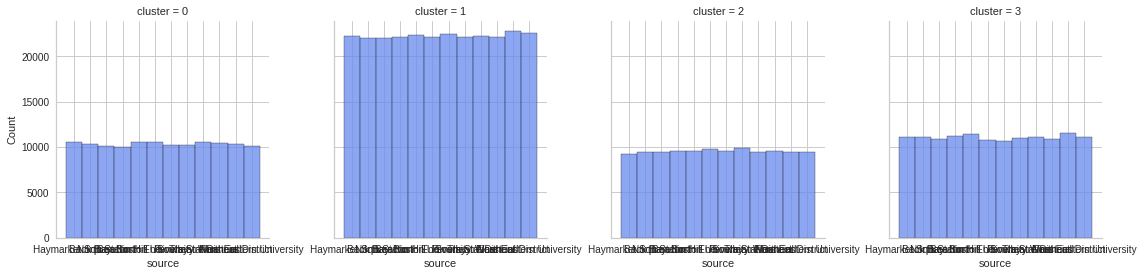

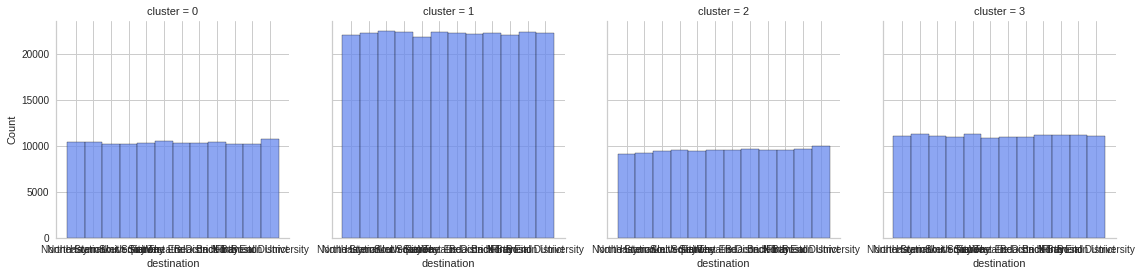

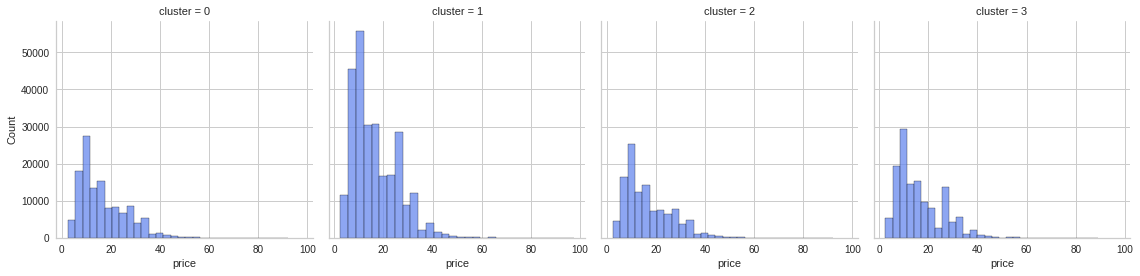

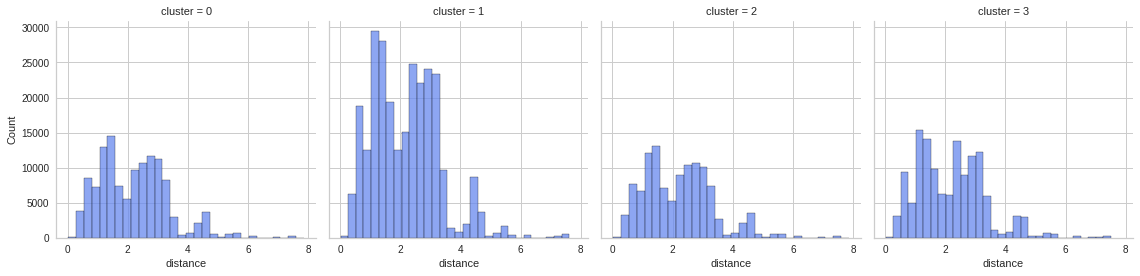

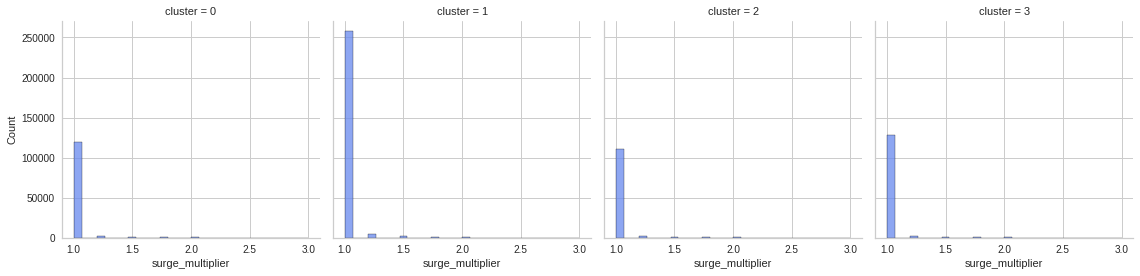

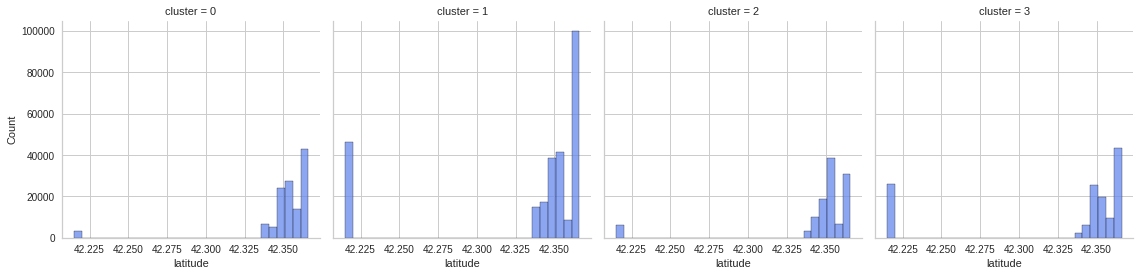

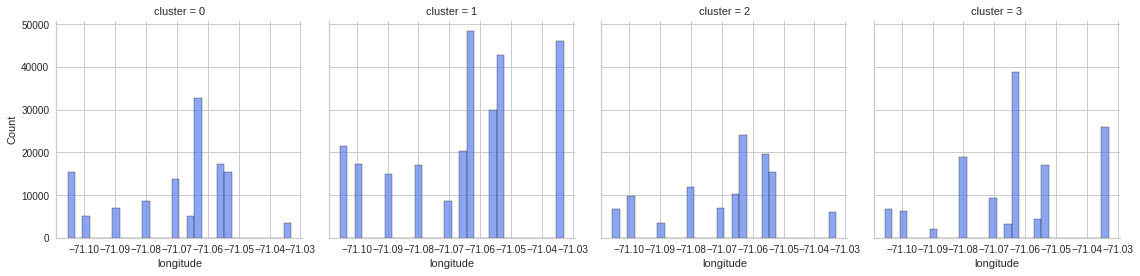

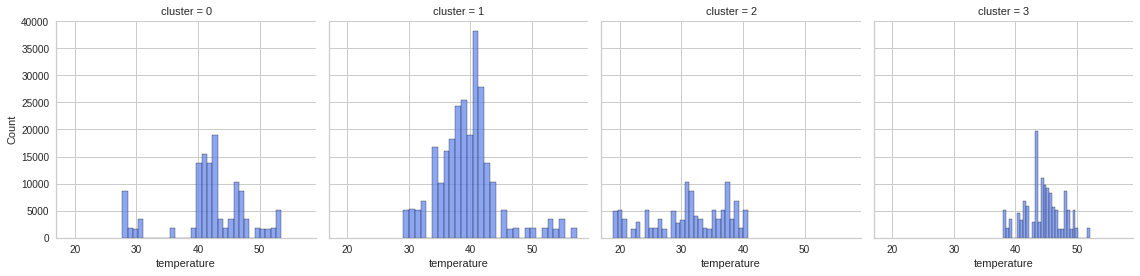

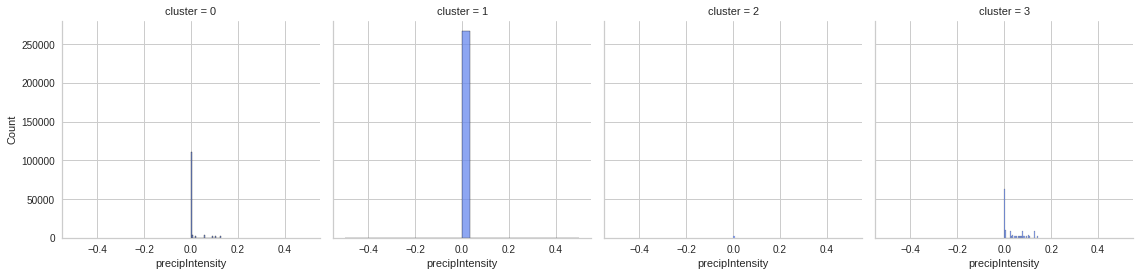

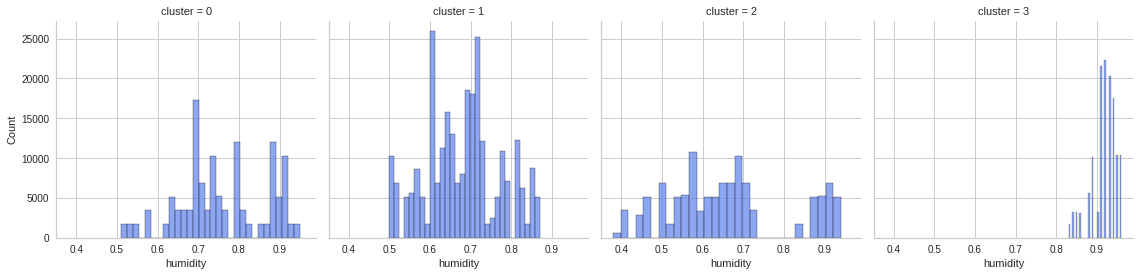

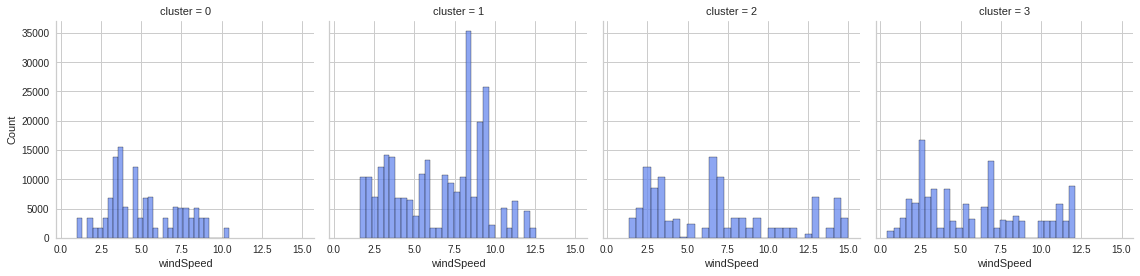

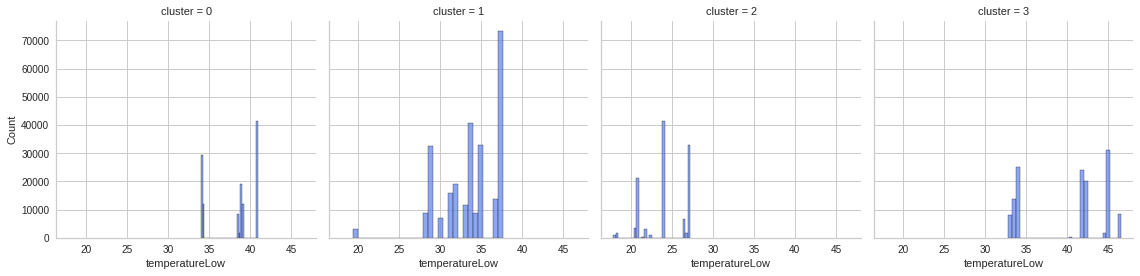

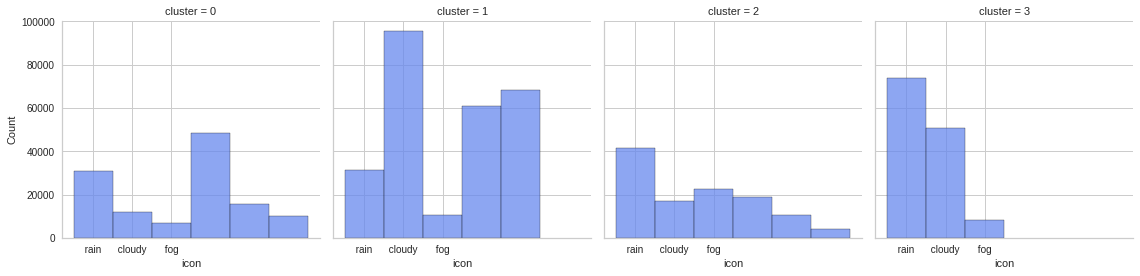

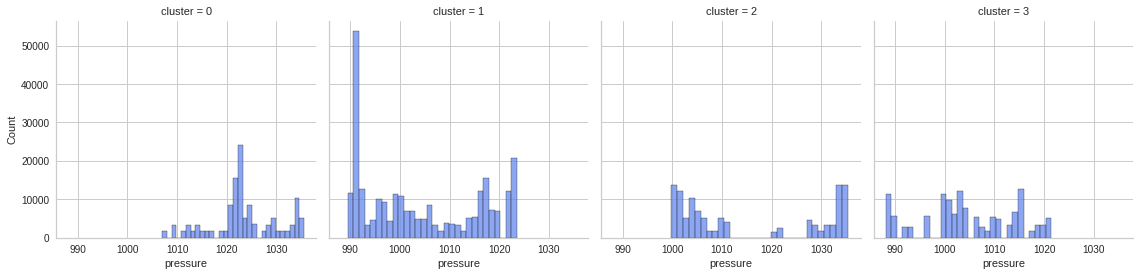

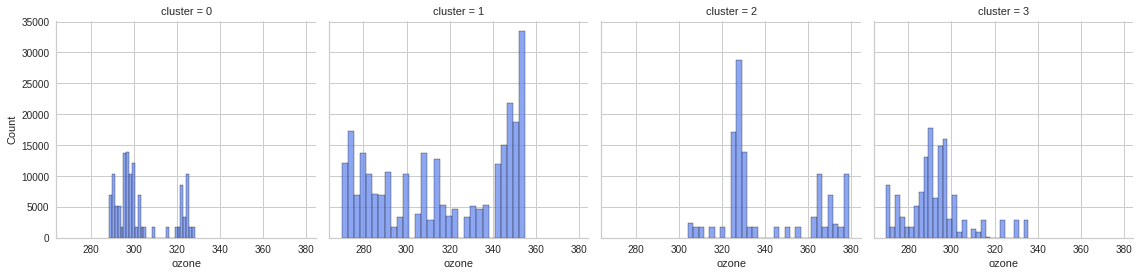

In [ ]:
sns.set_palette('coolwarm')
for i in df.drop(l,axis=1):
    grid = sns.FacetGrid(df,height=4,col='cluster')
    grid = grid.map(sns.histplot,i,bins=30)
plt.show()